# Figure and Examples From Chapter 1

Before we start any actual plotting code, here's some useful things to incude first.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino']}, size=18)

## Figure 1.2: A vector plot for flow about a stagnation point

The velocity field is given by
$$
u = \alpha x, \quad v = -\alpha y, \quad w = 0.
$$
The code below plots a vector field for this flow.

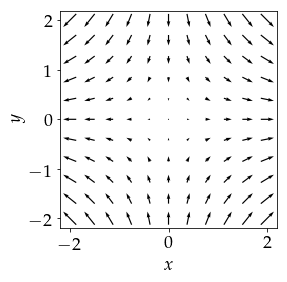

In [3]:
x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
x, y = np.meshgrid(x, y)

alpha = 1.0
u = alpha * x
v = -alpha * y

uu = np.sqrt(u*u + v*v)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ax.quiver(x, y, u, v, pivot='middle')

plt.savefig('fig_vector_plot.pdf', bbox_inches='tight')

## Figure 1.3: Plotting Streamlines

As an example of calculating and then plotting streamlines, consider the flow given by
$$
\mathbf{u} = [\alpha x, -\alpha y].
$$
Note that this is two dimensional, steady flow.

Streamlines are found from 
$$
\frac{dx/ds}{u} = \frac{dy/ds}{v},
$$
or, plugging in $u$ and $v$ from above (and removing the parameter for simplicity)
$$
\frac{dx}{\alpha x} = -\frac{dy}{\alpha y}.
$$
Rearranging, integrating both sides, and then solving for $y$ gives the function
$$
y(x) = \frac{c}{x}.
$$
That's our answer; $c$ is the integration constant, which will vary from streamline to streamline.

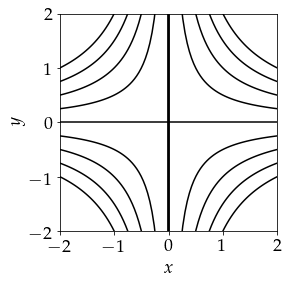

In [22]:
# here's the streamline function y(x).  Try your own!
def streamline_function(x, c):
    return c / x

# the rest of the code computes the lines ...
x = np.linspace(-2, 2, 100)
y = streamline_function(x, 0.0)
c = np.linspace(-2, 2, 9)

# ... and plots them.
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
for i in range(len(c)):
    y = streamline_function(x, c[i])
    ax.plot(x, y, color='black')

plt.savefig('fig_streamline_example.pdf', bbox_inches='tight')

## Figure 1.6: a shear flow

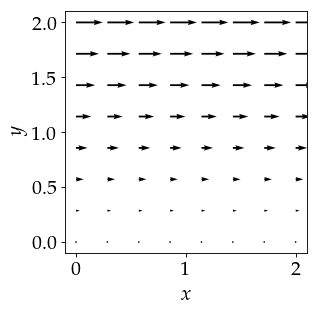

In [4]:
x=np.linspace(0, 2, 8)
y=np.linspace(0, 2, 8)
x, y=np.meshgrid(x, y)

beta = 1.0
u = beta * y
v = 0.0

uu = np.sqrt(u*u + v*v)

fig = plt.figure(figsize=(4, 4), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
plt.quiver(x, y, u, v, pivot='tail')

plt.savefig("fig_shear_vector.pdf", bbox_inches='tight')

## Figure 1.6:  Line vortex

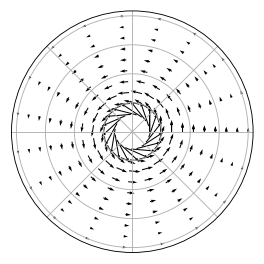

In [28]:
radii = np.linspace(0.3, 2, 10)
thetas = np.linspace(0,2*np.pi,20)
theta, r = np.meshgrid(thetas, radii)

k = 1.0
u_r = 0.0
u_theta = k / r

fig = plt.figure(figsize=(4, 4), dpi=80)
ax = fig.add_subplot(111, projection='polar')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.quiver(theta, r, u_r * np.cos(theta) - u_theta * np.sin(theta), u_r*np.sin(theta) + u_theta * np.cos(theta), pivot='tail')

plt.savefig("fig_line_vortex_vector.pdf")